# SVM for classification

Load IRIS dataset, check its contents:


In [8]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:10])
# print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0]


Split data into training and testing parts:

In [9]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [12]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [13]:
X = iris.data[:, :2]  # Select only the first two features (columns)
# Remove class 2 from the dataset
X = X[iris.target != 2]
y = iris.target[iris.target != 2]
     

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

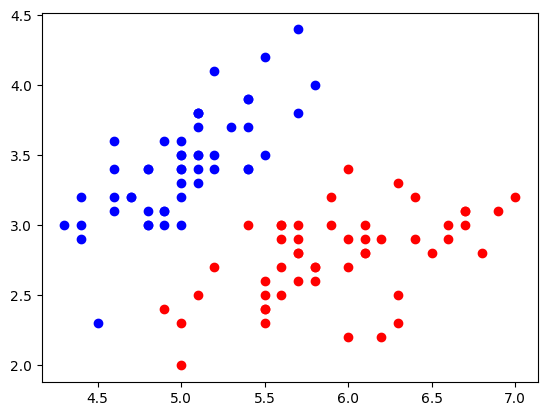

In [14]:
import matplotlib.pyplot as plt 
# plt.scatter(X[:,0],X[:,1])

plt.scatter(X[y==0,0],X[y==0,1],color="blue")

plt.scatter(X[y==1,0],X[y==1,1],color='red')

plt.scatter(X[y==2,0],X[y==2,1],color='cyan')



Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [15]:
X = iris.data[iris.target !=2, 0:2] 
print (X.shape) 
y = iris.target[iris.target != 2] 
SVMmodel_1 = SVC (kernel='linear', C=200)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.2) 
SVMmodel_1.fit(X_train_1,y_train_1)
#print (SVMmodel_1.get_params()) 
SVMmodel_1.score (X_test_1,y_test_1)

(100, 2)


1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[ 6.31449137 -5.26139431]]
[-17.31431158]


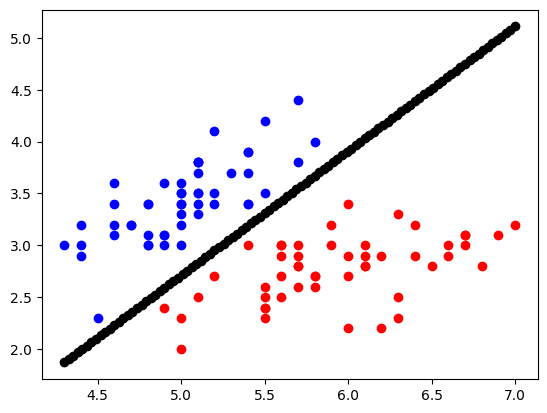

In [17]:
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here

#Separating line coefficients:
W=SVMmodel_1.coef_
b=SVMmodel_1.intercept_
print(W)
print(b)
import numpy as np
x1=np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2=-b/W[0,1]-W[0,0]/W[0,1]*x1
plt.scatter(X[y==0,0],X[y==0,1], color='blue')
plt.scatter(X[y==1,0],X[y==1,1], color='red') 
plt.scatter(x1,x2,color='black')
plt.show()


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

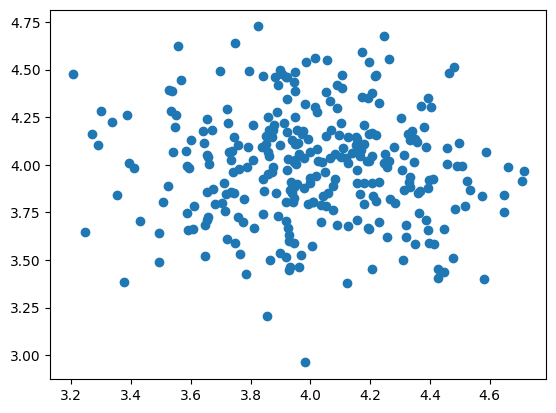

In [18]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

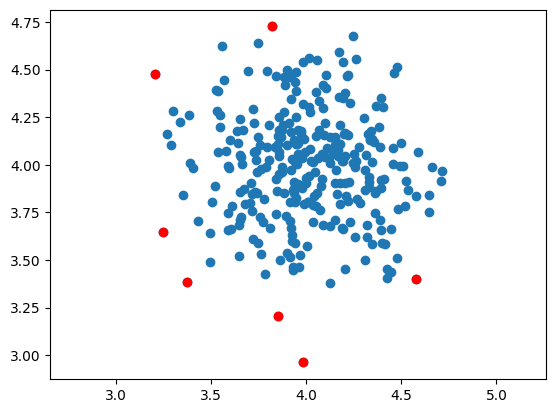

In [19]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

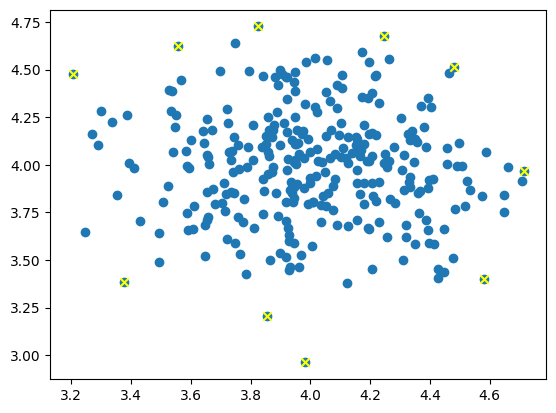

In [ ]:
# Get support vectors
support_vectors = SVMmodelOne.support_vectors_

# Plot support vectors
plt.scatter(x[:, 0], x[:, 1], label='Data points')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='yellow', marker='x', label='Support Vectors')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.989098620408397


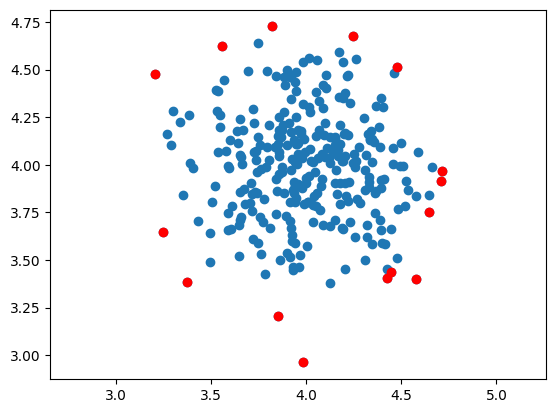

In [21]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.05) # Set the threshold as the 5% quantile of the scores
print(thresh)
index = where(scores<thresh) # Identify outliers (points with scores lower than the threshold)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red') # Mark outlier points as red
plt.axis('equal')
plt.show()